In [38]:
marker_dict = {
    "T_cells": ["CD3D", "CD3E", "TRBC1", "TRAC"],
    "CD4_T": ["CD4", "IL7R", "CCR7", "LTB"],
    "CD8_T": ["CD8A", "CD8B", "NKG7", "GZMB"],
    "NK_cells": ["NKG7", "GNLY", "GZMA", "GZMB"],
    "B_cells": ["MS4A1", "CD79A", "CD37", "HLA-DRA"],
    "Plasma_cells": ["MZB1", "JCHAIN", "IGHA1", "IGKC"],
    "Dendritic_cells": ["HLA-DRA", "CD74", "ITGAX", "FCER1A"],
    "Macrophages": ["LYZ", "CST3", "TYROBP", "C1QB"],
    "Endothelial": ["PECAM1", "VWF", "RAMP2", "EGFL7"],
    "Pericytes": ["RGS5", "TAGLN", "MYL9", "CALD1"],
    "Fibroblasts": ["COL1A1", "COL1A2", "DCN", "LUM"],
    "Basal_epithelial": ["KRT5", "KRT14", "S100A2", "TP63"]
}

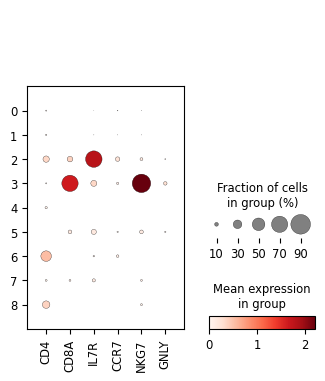

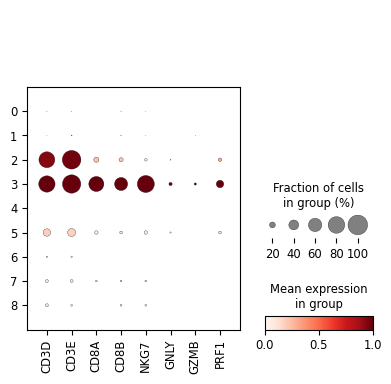

In [33]:
#Checking if  cluster 2 & 3 has cd4 or cd8
sc.pl.dotplot(
    adata,
    ['CD4','CD8A','IL7R','CCR7','NKG7','GNLY'],
    groupby='leiden_0.6'
)
sc.pl.dotplot(
    adata,
    ['CD3D','CD3E','CD8A','CD8B','NKG7','GNLY','GZMB','PRF1'],
    groupby='leiden_0.6',
    standard_scale='var'
)

categories: 0, 1, 2, etc.
var_group_labels: T_cells, CD4_T, CD8_T, etc.


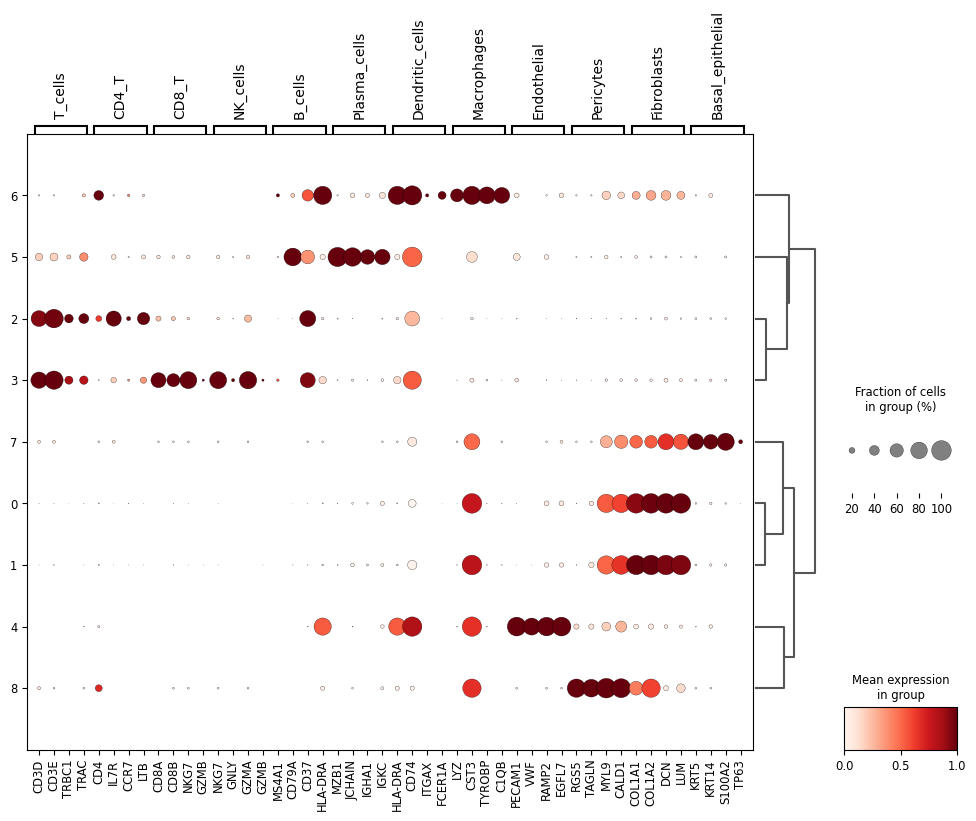

In [40]:
#validation of marker cell type with dotplot
sc.pl.dotplot(
    adata, 
    marker_dict, 
    groupby='leiden_0.6', 
    standard_scale='var', 
    figsize=(12,8),
    dendrogram=True
)

In [41]:
cluster_map = {
    "0": "Fibroblasts",
    "1": "Stellate / Fibroblast-like",
    "2": "T cells",
    "3": "Cytotoxic T / NK cells",
    "4": "Endothelial cells",
    "5": "Plasma cells",
    "6": "Dendritic / Macrophages",
    "7": "Basal epithelial cells",
    "8": "Pericytes",
    "9": "Endothelial (activated)",
    "10": "Other",
    "11": "Other",
    "12": "DC (MHC-II+)"
}

adata.obs["cell_type"] = adata.obs["leiden"].map(cluster_map)


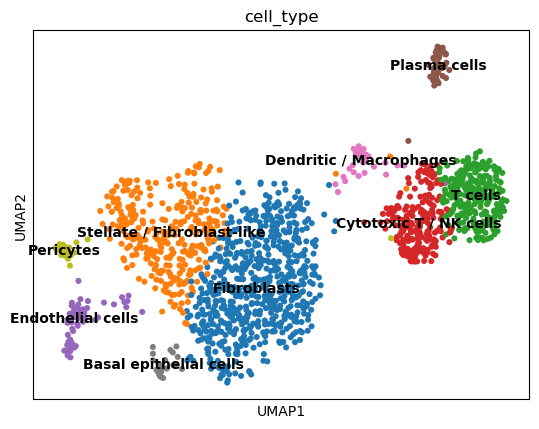

In [42]:
sc.pl.umap(adata, color="cell_type", legend_loc="on data")


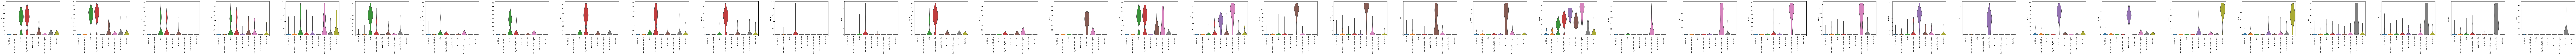

In [44]:

# Flatten all markers into a list for violin plot

violin_markers = [gene for genes in marker_dict.values() for gene in genes if gene in adata.var_names]
sc.pl.violin(
    adata, 
    violin_markers, 
    groupby='cell_type', 
    rotation=90,
    size=3,
    stripplot=False
)
